<a href="https://colab.research.google.com/github/Vishnuvardhan172709/Aiml-/blob/main/2303A510A0_B14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of South Indian travel Destinations using Holiday Data

1.Identify the top 5 attributes for south India destinations.                                              
2.Identify the attribute with most liked travel spots.     
3.Find the max and min attributes of choice for south India tourism                                              
4.What is the role of beaches, theatres, malls, parks in south India tourism                                        
5.Identify the sports with most attributes in south India
6.Apply either Classification Model or Clustering Model to evaluate the dataset                                       

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

# Load the dataset
file_path = "south_india_tourism.csv"  # Update with the actual path to the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


   Destination  Beaches  Theatres  Malls  Parks            Sports  Popularity  \
0          Goa        9         5      7      6      Water Sports          90   
1       Kerala        8         6      6      9          Ayurveda          85   
2      Chennai        6         7      8      7           Cricket          88   
3  Pondicherry        7         5      5      8      Water Sports          80   
4    Bangalore        2         9     10      9  Adventure Sports          89   

   Ratings  
0      4.8  
1      4.7  
2      4.6  
3      4.5  
4      4.6  


In [12]:
# 1. Identify the top 5 attributes for South India destinations
# Correlation matrix to find important attributes
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
correlation = numerical_df.corr()
top_attributes = correlation['Popularity'].sort_values(ascending=False).head(6)  # Including 'Popularity'
print("Top 5 Attributes Correlated with Popularity:\n", top_attributes[1:])  # Exclude Popularity itself

Top 5 Attributes Correlated with Popularity:
 Malls       0.759727
Ratings     0.662574
Theatres    0.451468
Beaches    -0.201682
Parks      -0.360940
Name: Popularity, dtype: float64


In [13]:
# 2. Attribute with most liked travel spots
most_liked = df[df['Popularity'] == df['Popularity'].max()]
print("Most Liked Travel Spot:\n", most_liked[['Destination', 'Popularity']])

Most Liked Travel Spot:
   Destination  Popularity
0         Goa          90


In [14]:
# 3. Max and Min attributes for South India tourism
max_attributes = df.max()
min_attributes = df.min()
print("Maximum Values of Attributes:\n", max_attributes)
print("Minimum Values of Attributes:\n", min_attributes)

Maximum Values of Attributes:
 Destination     Pondicherry
Beaches                   9
Theatres                  9
Malls                    10
Parks                     9
Sports         Water Sports
Popularity               90
Ratings                 4.8
dtype: object
Minimum Values of Attributes:
 Destination           Bangalore
Beaches                       2
Theatres                      5
Malls                         5
Parks                         6
Sports         Adventure Sports
Popularity                   80
Ratings                     4.5
dtype: object


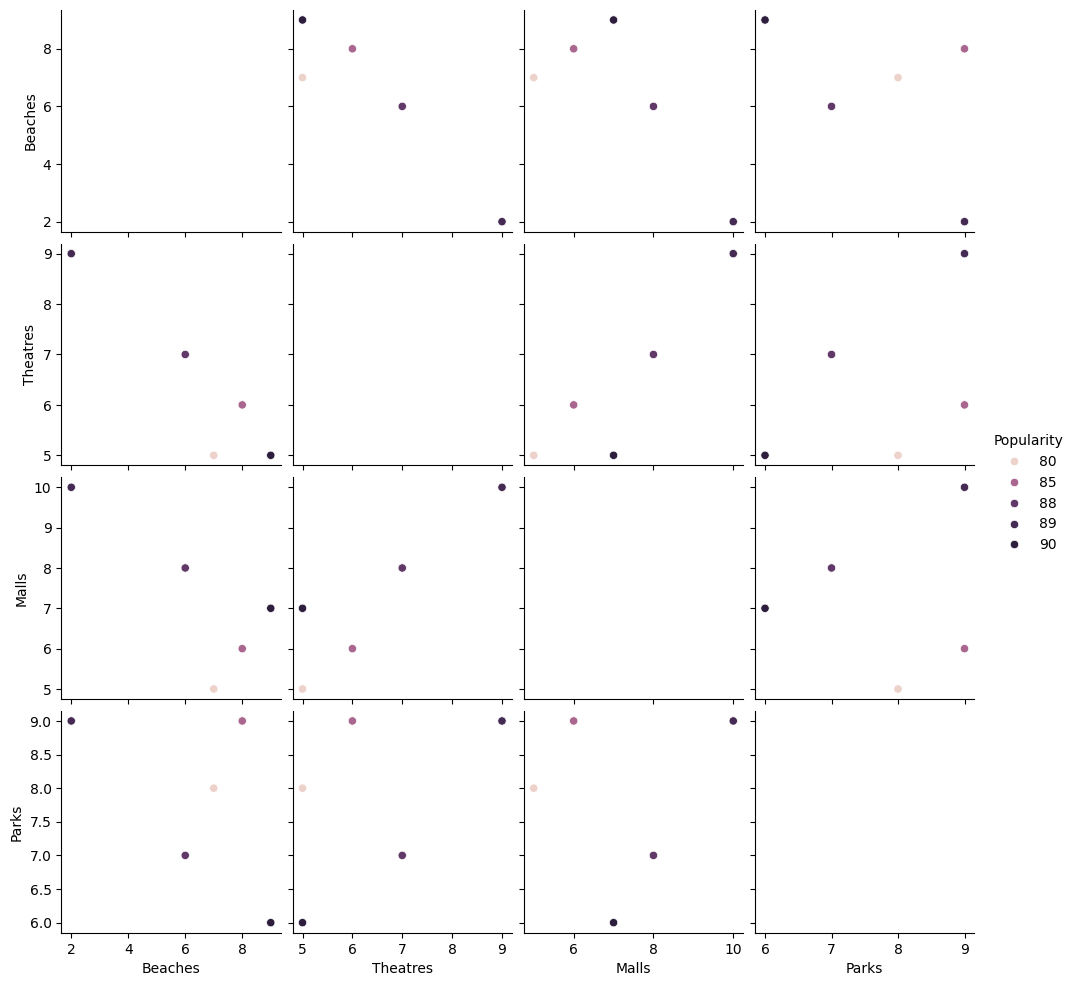

In [15]:
# 4. Role of Beaches, Theatres, Malls, Parks
attributes = ['Beaches', 'Theatres', 'Malls', 'Parks']
df[attributes].describe()

# Visualize their impact
sns.pairplot(df, vars=attributes, hue='Popularity')
plt.show()

In [16]:
# 5. Identify the sports with most attributes
sports_analysis = df[['Sports', 'Popularity']].groupby('Sports').mean()
print("Sports with Most Attributes:\n", sports_analysis.sort_values(by='Popularity', ascending=False))

Sports with Most Attributes:
                   Popularity
Sports                      
Adventure Sports        89.0
Cricket                 88.0
Ayurveda                85.0
Water Sports            85.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Classification Report:
               precision    recall  f1-score   support

          80       0.00      0.00      0.00       0.0
          85       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       0.0
          89       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Feature Importance:
     Feature  Importance
0   Beaches    0.223529
3     Parks    0.211765
4   Ratings    0.211765
1  Theatres    0.176471
2     Malls    0.176471


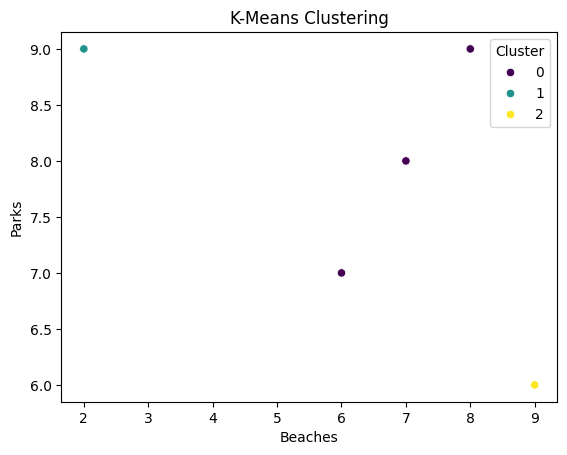

In [17]:
# 6. Apply Classification or Clustering
# Classification Model
X = df.drop(columns=['Destination', 'Popularity', 'Sports'])  # Features # Drop the 'Sports' column
y = df['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance from the classification model
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance_df)

# Clustering Model
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
sns.scatterplot(data=df, x='Beaches', y='Parks', hue='Cluster', palette='viridis')
plt.title("K-Means Clustering")
plt.show()
# Save results if needed
df.to_csv("south_india_tourism_results.csv", index=False)